In [1]:
import numpy as np
import sympy as sp

sp.init_printing()

In [2]:
# Parameters
t, s, m, c, p = sp.symbols('tau sigma mu c psi')
kn, ks = sp.symbols('k_n, k_s')
vars = sp.Matrix([s, t])
# Yield surfaces
F1 = sp.Matrix([t + m * s - c])
F2 = sp.Matrix([-t + m * s - c])

G1 = sp.Matrix([t + p * s - c])
G2 = sp.Matrix([-t + p * s - c])
# G1 = sp.Matrix([t - c +])
# G2 = sp.Matrix([-t - c])


dF1 = F1.jacobian(vars)
dF2 = F2.jacobian(vars)
dG1 = G1.jacobian(vars)
dG2 = G2.jacobian(vars)

D_el = sp.Matrix([[kn, 0], [0, ks]])

In [3]:
de, dg = sp.symbols('d_e d_g')
ds, dt = sp.symbols('d_s d_t')
dl = sp.symbols('dl')
s = sp.Matrix([s, t])
deps = sp.Matrix([de, dg])
dsig = sp.Matrix([ds, dt])

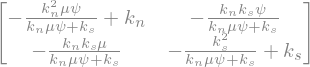

In [4]:
# Projection on F1
eqs1 = dsig - D_el * deps + D_el * (dl * dG1.T)
eq2 = F1[0] + dt + m * ds

eqs = list(eqs1) + [eq2]

sol1 = sp.solve(eqs, [ds, dt, dl])
sol1[ds]

# Tangent stiffness when F1 is active
D_ep = D_el - (((D_el * dG1.T) * (D_el * dF1.T).T) / (dF1 * D_el * dG1.T)[0])
D_ep

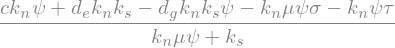

In [5]:
sol1[ds]

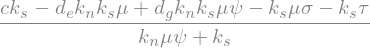

In [6]:
sol1[dt]

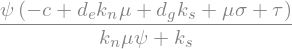

In [7]:
sol1[dl] * dG1[0]

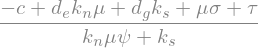

In [8]:
sol1[dl] * dG1[1]

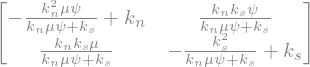

In [9]:
# Projection on F2
eqs1 = dsig - D_el * (deps - dl * dG2.T)
eq2 = F2[0] - dt + m * ds

eqs = list(eqs1) + [eq2]

sol2 = sp.solve(eqs, [ds, dt, dl])

# Tangent stiffness when F1 is active
D_ep = D_el - (((D_el * dG2.T) * (D_el * dF2.T).T) / (dF2 * D_el * dG2.T)[0])
D_ep

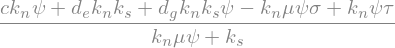

In [10]:
sol2[ds]

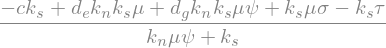

In [11]:
sol2[dt]

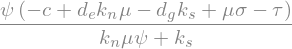

In [12]:
sol2[dl] * dG2[0]

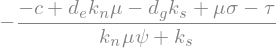

In [13]:
sol2[dl] * dG2[1]

In [14]:
a, b = sp.symbols('a b')
c, d, e, f = sp.symbols('c d e f')

kA = sp.Matrix([[0, 0], [0, b]])
kB = sp.Matrix([[c, d], [e, f]])

k_eq_inv = kA.inv() + kB.inv()
k_eq = k_eq_inv.inv()

k_eq
#k_eq

NonInvertibleMatrixError: Matrix det == 0; not invertible.

In [ ]:
import numpy as np
import scipy as sc

kA = np.array([[0, 0], [0, 2]])
kB = np.array([[1, 2], [3, 4]])

null_A = sc.linalg.null_space(kA)
null_A
np.array([-null_A[1], null_A[0]])
#k_eq_inv = np.linalg.inv(kA) + np.linalg.inv(kB)
#k_eq = np.linalg.inv(k_eq_inv)

#k_eq

array([[-0.],
       [ 1.]])